In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout, Lambda
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img
import pandas as pd
from keras import backend as K

In [2]:
resolution = 250

df = pd.read_csv('D:/Uni/Year 3 Summer/NSERC/First_task_bismuth/regression_neural_net_normalised/morelabels.csv', )
df['id'] = df['id'] + '.png'
df['label'] = df['label'].astype(float)
df = df.sample(frac = 1)

TRAIN_CUT = int(len(df) * 0.9)

df_train = df[0:TRAIN_CUT]
df_validate = df[TRAIN_CUT:]

In [3]:
print(df_train)

               id  label
1025  img1025.png   0.51
1829  img1829.png   0.91
621    img621.png   0.31
359    img359.png   0.17
1702  img1702.png   0.85
...           ...    ...
1789  img1789.png   0.89
1177  img1177.png   0.58
644    img644.png   0.32
1258  img1258.png   0.62
1218  img1218.png   0.60

[1854 rows x 2 columns]


In [4]:

#Augment data. Note that I divide the images by 12000 as I saved them to all have a maximum of 12000
train_datagen = ImageDataGenerator(
    rescale=1. / 12000,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    rotation_range=30,
    fill_mode='nearest',
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe = df_train,
    directory = 'D:\\Uni\\Year 3 Summer\\NSERC\\First_task_bismuth\\regression_neural_net_normalised\\moreimages',
    x_col = 'id',
    y_col = 'label',
    target_size = (resolution, resolution),
    color_mode = 'grayscale',
    class_mode = 'raw',
    batch_size = 16,
)

test_datagen = ImageDataGenerator(
    rescale=1 / 12000
)

validation_generator = test_datagen.flow_from_dataframe(
    dataframe = df_validate,
    directory = 'D:\\Uni\\Year 3 Summer\\NSERC\\First_task_bismuth\\regression_neural_net_normalised\\moreimages',
    x_col = 'id',
    y_col = 'label',
    target_size = (resolution, resolution),
    color_mode = 'grayscale',
    class_mode = 'raw',
    batch_size = 16,
)

Found 1854 validated image filenames.
Found 206 validated image filenames.


In [5]:
accepted_diff = 0.03 
def linear_regression_equality(y_true, y_pred):
    diff = K.abs(y_true-y_pred)
    return K.mean(K.cast(diff < accepted_diff, tf.float32))

initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=300,
    decay_rate=0.96,
    staircase=True)

In [6]:
model17 = tf.keras.models.Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape = (resolution, resolution, 1)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, 'relu'),
    Dense(64, 'relu'),
    Dense(1)
])


model17.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.RMSprop(learning_rate = lr_schedule), 
                metrics = [linear_regression_equality])

In [7]:
history17 = model17.fit(train_generator, epochs = 100, steps_per_epoch = None, validation_data = validation_generator, verbose = 1, validation_steps = None)

Epoch 1/100
116/116 [==============================] - 15s 96ms/step - loss: 2.6714 - linear_regression_equality: 0.0609 - val_loss: 0.3029 - val_linear_regression_equality: 0.0577
Epoch 2/100
116/116 [==============================] - 11s 92ms/step - loss: 0.0935 - linear_regression_equality: 0.0653 - val_loss: 0.1192 - val_linear_regression_equality: 0.1071
Epoch 3/100
116/116 [==============================] - 11s 93ms/step - loss: 0.0460 - linear_regression_equality: 0.1311 - val_loss: 0.0107 - val_linear_regression_equality: 0.2507
Epoch 4/100
116/116 [==============================] - 11s 93ms/step - loss: 0.0200 - linear_regression_equality: 0.2072 - val_loss: 0.0150 - val_linear_regression_equality: 0.1216
Epoch 5/100
116/116 [==============================] - 11s 90ms/step - loss: 0.0119 - linear_regression_equality: 0.2808 - val_loss: 0.0039 - val_linear_regression_equality: 0.3214
Epoch 6/100
116/116 [==============================] - 11s 92ms/step - loss: 0.0077 - linear_re

In [10]:
def plot_loss(history, start_point):

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['linear_regression_equality']
    val_accuracy = history.history['val_linear_regression_equality']

    epochs = range(len(loss))
    
    plt.figure(1)
    plt.plot(epochs[start_point:], loss[start_point:], 'r', label = 'training loss')
    plt.plot(epochs[start_point:], val_loss[start_point:], 'b', label = 'validation loss')
    plt.title('training and validation loss')
    plt.legend(loc = 0)
    
    plt.figure(2)
    plt.plot(epochs[start_point:], accuracy[start_point:], 'r', label = 'training accuracy')
    plt.plot(epochs[start_point:], val_accuracy[start_point:], 'b', label = 'validation accuracy')
    plt.title('training and validation accuracy')
    plt.legend(loc = 0)

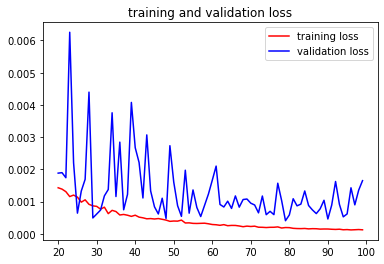

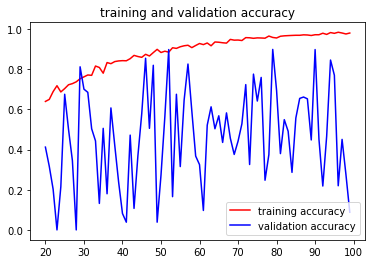

In [11]:
plot_loss(history17, 20)

In [12]:
model17.save('D:\\Uni\\Year 3 Summer\\NSERC\\First_task_bismuth\\saved_model\\my_regression_model_normalised')

INFO:tensorflow:Assets written to: D:\Uni\Year 3 Summer\NSERC\First_task_bismuth\saved_model\my_regression_model_normalised\assets


In [7]:
model1 = tf.keras.models.Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape = (resolution, resolution, 1)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, 'relu'),
    Dropout(0.2),
    Dense(64, 'relu'),
    Dropout(0.2),
    Dense(1)
])


model1.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.RMSprop(learning_rate = lr_schedule), 
                metrics = [linear_regression_equality])

In [8]:
history1 = model1.fit(train_generator, epochs = 100, steps_per_epoch = None, validation_data = validation_generator, verbose = 1, validation_steps = None)

Epoch 1/100
116/116 [==============================] - 81s 582ms/step - loss: 1.3170 - linear_regression_equality: 0.0572 - val_loss: 0.2946 - val_linear_regression_equality: 0.0536
Epoch 2/100
116/116 [==============================] - 11s 92ms/step - loss: 0.1132 - linear_regression_equality: 0.0657 - val_loss: 0.0385 - val_linear_regression_equality: 0.0584
Epoch 3/100
116/116 [==============================] - 11s 92ms/step - loss: 0.0622 - linear_regression_equality: 0.1095 - val_loss: 0.1079 - val_linear_regression_equality: 0.0872
Epoch 4/100
116/116 [==============================] - 11s 92ms/step - loss: 0.0402 - linear_regression_equality: 0.1659 - val_loss: 0.0388 - val_linear_regression_equality: 0.0865
Epoch 5/100
116/116 [==============================] - 11s 91ms/step - loss: 0.0232 - linear_regression_equality: 0.2233 - val_loss: 0.0058 - val_linear_regression_equality: 0.2768
Epoch 6/100
116/116 [==============================] - 11s 92ms/step - loss: 0.0180 - linear_r

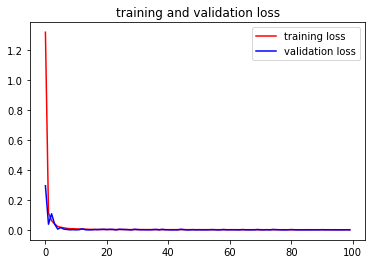

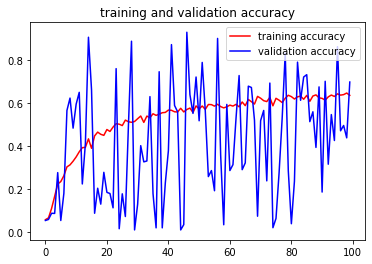

In [9]:
plot_loss(history1, 0)

In [11]:
model1.save('D:\\Uni\\Year 3 Summer\\NSERC\\First_task_bismuth\\saved_model\\my_regression_model1_normalised')

INFO:tensorflow:Assets written to: D:\Uni\Year 3 Summer\NSERC\First_task_bismuth\saved_model\my_regression_model1_normalised\assets


In [7]:
model2 = tf.keras.models.Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape = (resolution, resolution, 1)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, 'relu'),
    Dropout(0.2),
    Dense(64, 'relu'),
    Dense(1)
])


model2.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.RMSprop(learning_rate = lr_schedule), 
                metrics = [linear_regression_equality])

In [8]:
history2 = model2.fit(train_generator, epochs = 100, steps_per_epoch = None, validation_data = validation_generator, verbose = 1, validation_steps = None)

Epoch 1/100
116/116 [==============================] - 92s 638ms/step - loss: 0.6716 - linear_regression_equality: 0.0647 - val_loss: 0.0852 - val_linear_regression_equality: 0.0783
Epoch 2/100
116/116 [==============================] - 11s 92ms/step - loss: 0.0776 - linear_regression_equality: 0.0803 - val_loss: 0.0225 - val_linear_regression_equality: 0.1600
Epoch 3/100
116/116 [==============================] - 11s 92ms/step - loss: 0.0387 - linear_regression_equality: 0.1435 - val_loss: 0.0084 - val_linear_regression_equality: 0.2521
Epoch 4/100
116/116 [==============================] - 11s 92ms/step - loss: 0.0215 - linear_regression_equality: 0.1986 - val_loss: 0.0920 - val_linear_regression_equality: 0.0000e+00
Epoch 5/100
116/116 [==============================] - 11s 91ms/step - loss: 0.0200 - linear_regression_equality: 0.2258 - val_loss: 0.0022 - val_linear_regression_equality: 0.6168
Epoch 6/100
116/116 [==============================] - 11s 91ms/step - loss: 0.0138 - line

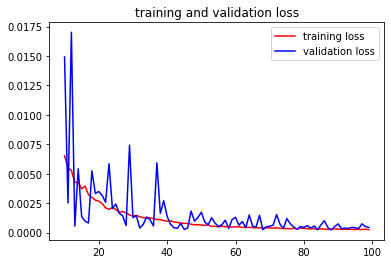

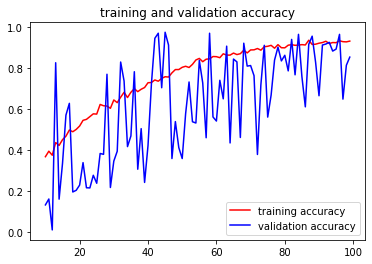

In [13]:
plot_loss(history2, 10)

In [14]:
model2.save('D:\\Uni\\Year 3 Summer\\NSERC\\First_task_bismuth\\saved_model\\my_regression_model2_divided')

INFO:tensorflow:Assets written to: D:\Uni\Year 3 Summer\NSERC\First_task_bismuth\saved_model\my_regression_model2_divided\assets
